In [575]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import matplotlib.lines as mlines
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sys import stdout
import pickle

In [576]:
deriv_num = 1
window_len = 25
poly_or = 5

### Hỗn hợp

In [577]:
honhop_folder = "data2/Honhop"
data_frames = []
file_names = []
for index, file_name in enumerate(os.listdir(honhop_folder)):
    if file_name.endswith(".CSV"):  # Check if the file is a CSV
        file_path = os.path.join(honhop_folder, file_name)
        df = pd.read_csv(file_path, header=None).values
        if index == 0:
            data_frames.append(df[:, 0].reshape(1, -1))
        data_frames.append(df[:, 1].reshape(1, -1))
        file_names.append(file_name)
honhop = pd.DataFrame(np.concatenate(data_frames[1:]), columns=list(data_frames[0]))
honhop.columns = ['_'.join(map(str, col)) for col in honhop.columns]
honhop["File name"] = file_names
honhop["Type"] = honhop["File name"].str.split("-", expand=True)[0].str[0]

### Rễ

In [578]:
re_folder = "data2/Re"
data_frames = []
file_names = []
for index, file_name in enumerate(os.listdir(re_folder)):
    if file_name.endswith(".CSV"):  # Check if the file is a CSV
        file_path = os.path.join(re_folder, file_name)
        df = pd.read_csv(file_path, header=None).values
        if index == 0:
            data_frames.append(df[:, 0].reshape(1, -1))
        data_frames.append(df[:, 1].reshape(1, -1))
        file_names.append(file_name)
re = pd.DataFrame(np.concatenate(data_frames[1:]), columns=list(data_frames[0]))
re.columns = ['_'.join(map(str, col)) for col in re.columns]
re["File name"] = file_names
re["Type"] = re["File name"].str.split("-", expand=True)[0].str[0]

### Thân

In [579]:
than_folder = "data2/Than"
data_frames = []
file_names = []
for index, file_name in enumerate(os.listdir(than_folder)):
    if file_name.endswith(".CSV"):  # Check if the file is a CSV
        file_path = os.path.join(than_folder, file_name)
        df = pd.read_csv(file_path, header=None).values
        if index == 0:
            data_frames.append(df[:, 0].reshape(1, -1))
        data_frames.append(df[:, 1].reshape(1, -1))
        file_names.append(file_name)
than = pd.DataFrame(np.concatenate(data_frames[1:]), columns=list(data_frames[0]))
than.columns = ['_'.join(map(str, col)) for col in than.columns]
than["File name"] = file_names
than["Type"] = than["File name"].str.split("-", expand=True)[0].str[0]

In [580]:
honhop_folder = "data2/testHonhop"
data_frames = []
file_names = []
for index, file_name in enumerate(os.listdir(honhop_folder)):
    if file_name.endswith(".CSV"):  # Check if the file is a CSV
        file_path = os.path.join(honhop_folder, file_name)
        df = pd.read_csv(file_path, header=None).values
        if index == 0:
            data_frames.append(df[:, 0].reshape(1, -1))
        data_frames.append(df[:, 1].reshape(1, -1))
        file_names.append(file_name + "new")
honhop_test = pd.DataFrame(np.concatenate(data_frames[1:]), columns=list(data_frames[0]))
honhop_test.columns = ['_'.join(map(str, col)) for col in honhop_test.columns]
honhop_test["File name"] = file_names
honhop_test["Type"] = honhop_test["File name"].str.split("-", expand=True)[0].str[0]

In [581]:

def snv(input_data):
  
    # Define a new array and populate it with the corrected data  
    output_data = np.zeros_like(input_data)
    for i in range(input_data.shape[0]):
 
        # Apply correction
        output_data[i,:] = (input_data[i,:] - np.mean(input_data[i,:])) / np.std(input_data[i,:])
 
    return output_data

In [582]:
data = pd.concat([honhop, re, than, honhop_test], axis=0)
data.shape

(159, 1871)

In [583]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(data["Type"])

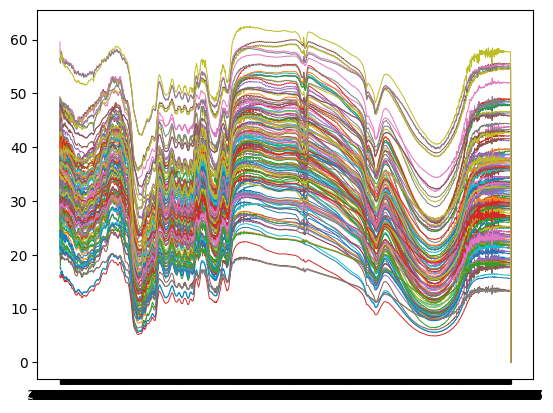

In [584]:
X = data.iloc[:, :-2]
wl = X.columns

Xsnv = snv(X.values)
plt.plot(X.T, linewidth = 0.7)
plt.show()

In [585]:
X = savgol_filter(Xsnv, window_length = window_len,  polyorder=poly_or, deriv = deriv_num)

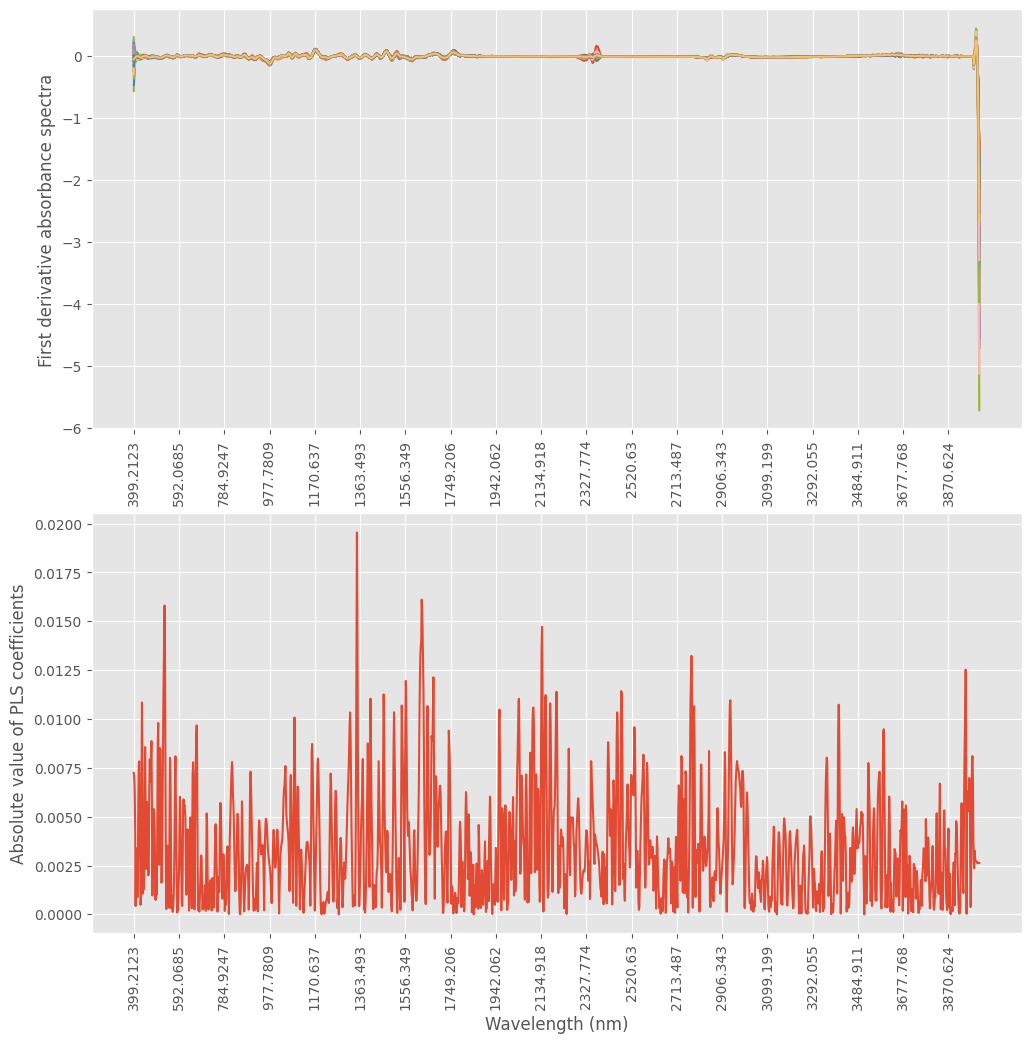

In [586]:
from sklearn.cross_decomposition import PLSRegression
pls = PLSRegression(8)
pls.fit(X, y)


# print(np.abs(pls.coef_)reshape(-1,1))
plt.figure(figsize=(12,12))
with plt.style.context(('ggplot')):
    ax1 = plt.subplot(211)
    plt.plot(wl, X.T)
    plt.ylabel('First derivative absorbance spectra')
    plt.gca().set_xticks(np.arange(0, len(wl), 100))
    plt.xticks(rotation=90)
 
    ax2 = plt.subplot(212, sharex=ax1)
    plt.plot(wl, np.abs(pls.coef_).reshape(-1,1))
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Absolute value of PLS coefficients')
    plt.gca().set_xticks(np.arange(0, len(wl), 100))
    plt.xticks(rotation=90)
 
    plt.show()

In [587]:
# Open the file in binary mode 
with open('file.pkl', 'rb') as file: 
      
    # Call load method to deserialze 
    params = pickle.load(file) 
  
    print(params) 

{'wav': 1785, 'sorted_ind': array([ 416, 1196, 1801, ...,  637,  636,  493], dtype=int64)}


In [588]:
sorted_ind = params['sorted_ind']
wav = params['wav']
X_new = X[:,sorted_ind][:, wav:]

In [589]:
# load
with open('model.pkl', 'rb') as f:
    clf2 = pickle.load(f)
with open('scaler.pkl', 'rb') as f:
    scale = pickle.load(f)

X_scaled = scale.transform(X_new)
X_lda = clf2.transform(X_scaled)

In [590]:
import plotly.graph_objects as go


# Create a scatter plot
fig = go.Figure()
hover_text = data["File name"].values
color_map = {
    0: 'orange',
    1: 'blue',
    2: 'red'
}
# Add scatter trace
fig.add_trace(go.Scatter(
    x=X_lda[:, 0],
    y=X_lda[:, 1],
    mode='markers',  # Display markers and text
    marker=dict(
        size=10, 
        color = y,
        colorscale='Viridis', 
        colorbar=dict(title='Type', tickvals = [0,1,2], ticktext = ['Hỗn hợp', 'Rễ', 'Thân']),  
        showscale=True,
        line=dict(
            width=2,  # Width of the border
            color='black'  # Border color
        )
        ),
    hovertemplate = hover_text,

))

# Update layout
fig.update_layout(
    title='2D Scatter Plot Example',
    xaxis_title='X Axis',
    yaxis_title='Y Axis',
    width = 600,
    height = 600,
)

# Show the plot
fig.show()

In [591]:
test_folder = "data2/Test"
data_frames = []
file_names = []
for index, file_name in enumerate(os.listdir(test_folder)):
    if file_name.endswith(".CSV"):  # Check if the file is a CSV
        file_path = os.path.join(test_folder, file_name)
        df = pd.read_csv(file_path, header=None).values
        if index == 0:
            data_frames.append(df[:, 0].reshape(1, -1))
        data_frames.append(df[:, 1].reshape(1, -1))
        file_names.append(file_name)
test = pd.DataFrame(np.concatenate(data_frames[1:]), columns=list(data_frames[0]))
test.columns = ['_'.join(map(str, col)) for col in test.columns]
test["File name"] = file_names
test["Type"] = test["File name"].str.split("-", expand=True)[0].str[0]

In [592]:
# plt.plot(test.iloc[:, :-2].T, linewidth = 0.7, color = 'green')
# plt.plot(snv(data.iloc[:, :-2].values).T, linewidth = 0.7, color = 'red')
# plt.show()

In [593]:
X_test = test.iloc[:, :-2]
X_test_snv = snv(X_test.values)
X_test = savgol_filter(X_test_snv, window_length = window_len,  polyorder=poly_or, deriv = deriv_num)
X_test = X_test[:,sorted_ind][:, wav:]

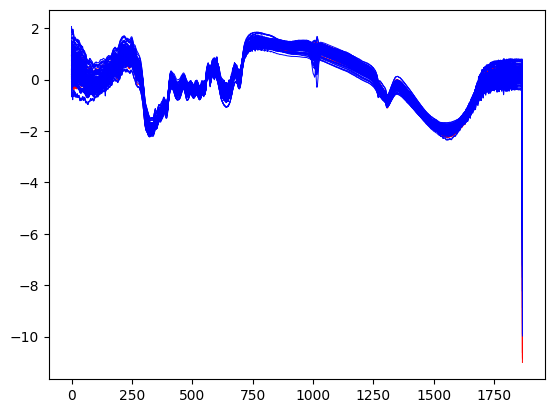

In [594]:
plt.plot(X_test_snv.T, color = 'r', linewidth = 0.7)
plt.plot(Xsnv.T, color = 'b', linewidth = 0.7)
plt.show()

In [595]:
X_test_scaled = scale.transform(X_test)
X_test_lda = clf2.transform(X_test_scaled)

In [596]:
import numpy as np

In [597]:
label = {
    0: "Hỗn hợp",
    1: "Rễ",
    2: "Thân"
}

In [598]:
predict = clf2.predict(X_test_scaled)
pred_label = np.array([label[i] for i in predict])

In [599]:
pd.DataFrame(np.concatenate([test["File name"].values.reshape(-1,1)
                             ,pred_label.reshape(-1,1)], axis = 1), columns=["Mẫu đo", "Dự đoán"])

,Mẫu đo,Dự đoán
0,M1.CSV,Hỗn hợp
1,M2.CSV,Rễ
2,M3.CSV,Hỗn hợp
3,M4.CSV,Hỗn hợp
4,M5-1.CSV,Thân
5,M5-2.CSV,Thân
6,M5-3.CSV,Thân
7,M5-4.CSV,Thân
8,M5-5.CSV,Thân


In [600]:
import plotly.graph_objects as go


# Create a scatter plot
fig = go.Figure()
hover_text1 = data["File name"].values
hover_text2 = test["File name"].values
color_map = {
    0: 'orange',
    1: 'blue',
    2: 'red'
}
# Add scatter trace
fig.add_trace(go.Scatter(
    x=X_lda[:, 0],
    y=X_lda[:, 1],
    mode='markers',  # Display markers and text
    marker=dict(
        size=10, 
        color = y,
        colorscale='Viridis', 
        colorbar=dict(title='Type', tickvals = [0,1,2], ticktext = ['Hỗn hợp', 'Rễ', 'Thân']),  
        showscale=True,
        line=dict(
            width=2,  # Width of the border
            color='black'  # Border color
        )
        ),
    hovertemplate = hover_text1,

))
fig.add_trace(go.Scatter(
    x=X_test_lda[:, 0],
    y=X_test_lda[:, 1],
    mode='markers + text',  # Display markers and text
    marker=dict(
        size=10, 
        color = 'green',
        line=dict(
            width=2,  # Width of the border
            color='black'  # Border color
        )
        ),
    # hovertemplate = hover_text2,
    text = hover_text2,
    textposition="top right",
    textfont=dict(
        color='red',  # Change the text color
        size=14,      # Change the text size
        family='Arial, sans-serif',  # Change the font family
        # Set the text to bold
        # weight='bold'  
    )

))
fig.update_yaxes(range=[-12, 12])  # Set x-axis limits from 0 to 6
fig.update_xaxes(range=[-24, 24])  # Set y-axis limits from 9 to 15
# Update layout
fig.update_layout(
    title='2D Scatter Plot Example',
    xaxis_title='X Axis',
    yaxis_title='Y Axis',
    width = 600,
    height = 600,
    showlegend=False
)

# Show the plot
fig.show()